Logistic Regression to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on patient medical attributes.

target = 0 → Malignant

target = 1 → Benign

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('../data/data.csv')

In [ ]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
321,894618,M,20.16,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.07726,...,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933,NaN
430,907914,M,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,...,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550,NaN
238,883270,B,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,...,40.54,102.50,764.0,0.10810,0.24260,0.30640,0.08219,0.1890,0.07796,NaN
296,891936,B,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,...,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643,NaN
301,892604,B,12.46,19.89,80.43,471.3,0.08451,0.10140,0.06830,0.03099,...,23.07,88.13,551.3,0.10500,0.21580,0.19040,0.07625,0.2685,0.07764,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.isnull().sum().sort_values(ascending=False)

Unnamed: 32                569
compactness_se               0
fractal_dimension_worst      0
symmetry_worst               0
concave points_worst         0
concavity_worst              0
compactness_worst            0
smoothness_worst             0
area_worst                   0
perimeter_worst              0
texture_worst                0
radius_worst                 0
fractal_dimension_se         0
symmetry_se                  0
concave points_se            0
concavity_se                 0
id                           0
diagnosis                    0
area_se                      0
perimeter_se                 0
texture_se                   0
radius_se                    0
fractal_dimension_mean       0
symmetry_mean                0
concave points_mean          0
concavity_mean               0
compactness_mean             0
smoothness_mean              0
area_mean                    0
perimeter_mean               0
texture_mean                 0
radius_mean                  0
smoothne

In [ ]:
df.drop(columns=['Unnamed: 32', 'id'], inplace=True)

In [ ]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
246,0,13.200,17.43,84.13,541.6,0.07215,0.04524,0.04336,0.01105,0.1487,...,13.94,27.82,88.28,602.0,0.1101,0.1508,0.22980,0.04970,0.2767,0.07198
74,0,12.310,16.52,79.19,470.9,0.09172,0.06829,0.03372,0.02272,0.1720,...,14.11,23.21,89.71,611.1,0.1176,0.1843,0.17030,0.08660,0.2618,0.07609
534,0,10.960,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
184,1,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
416,0,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,...,10.85,31.24,68.73,359.4,0.1526,0.1193,0.06141,0.03770,0.2872,0.08304


In [ ]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

 Exploratory Data Analysis (EDA)

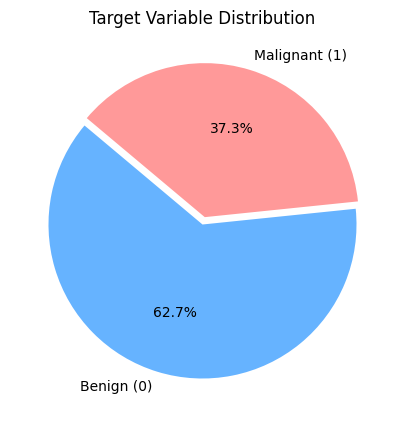

In [ ]:
plt.figure(figsize=(5,5))
labels = ['Benign (0)', 'Malignant (1)']
counts = df['diagnosis'].value_counts()
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140, explode=[0,0.05])
plt.title('Target Variable Distribution')
plt.show()

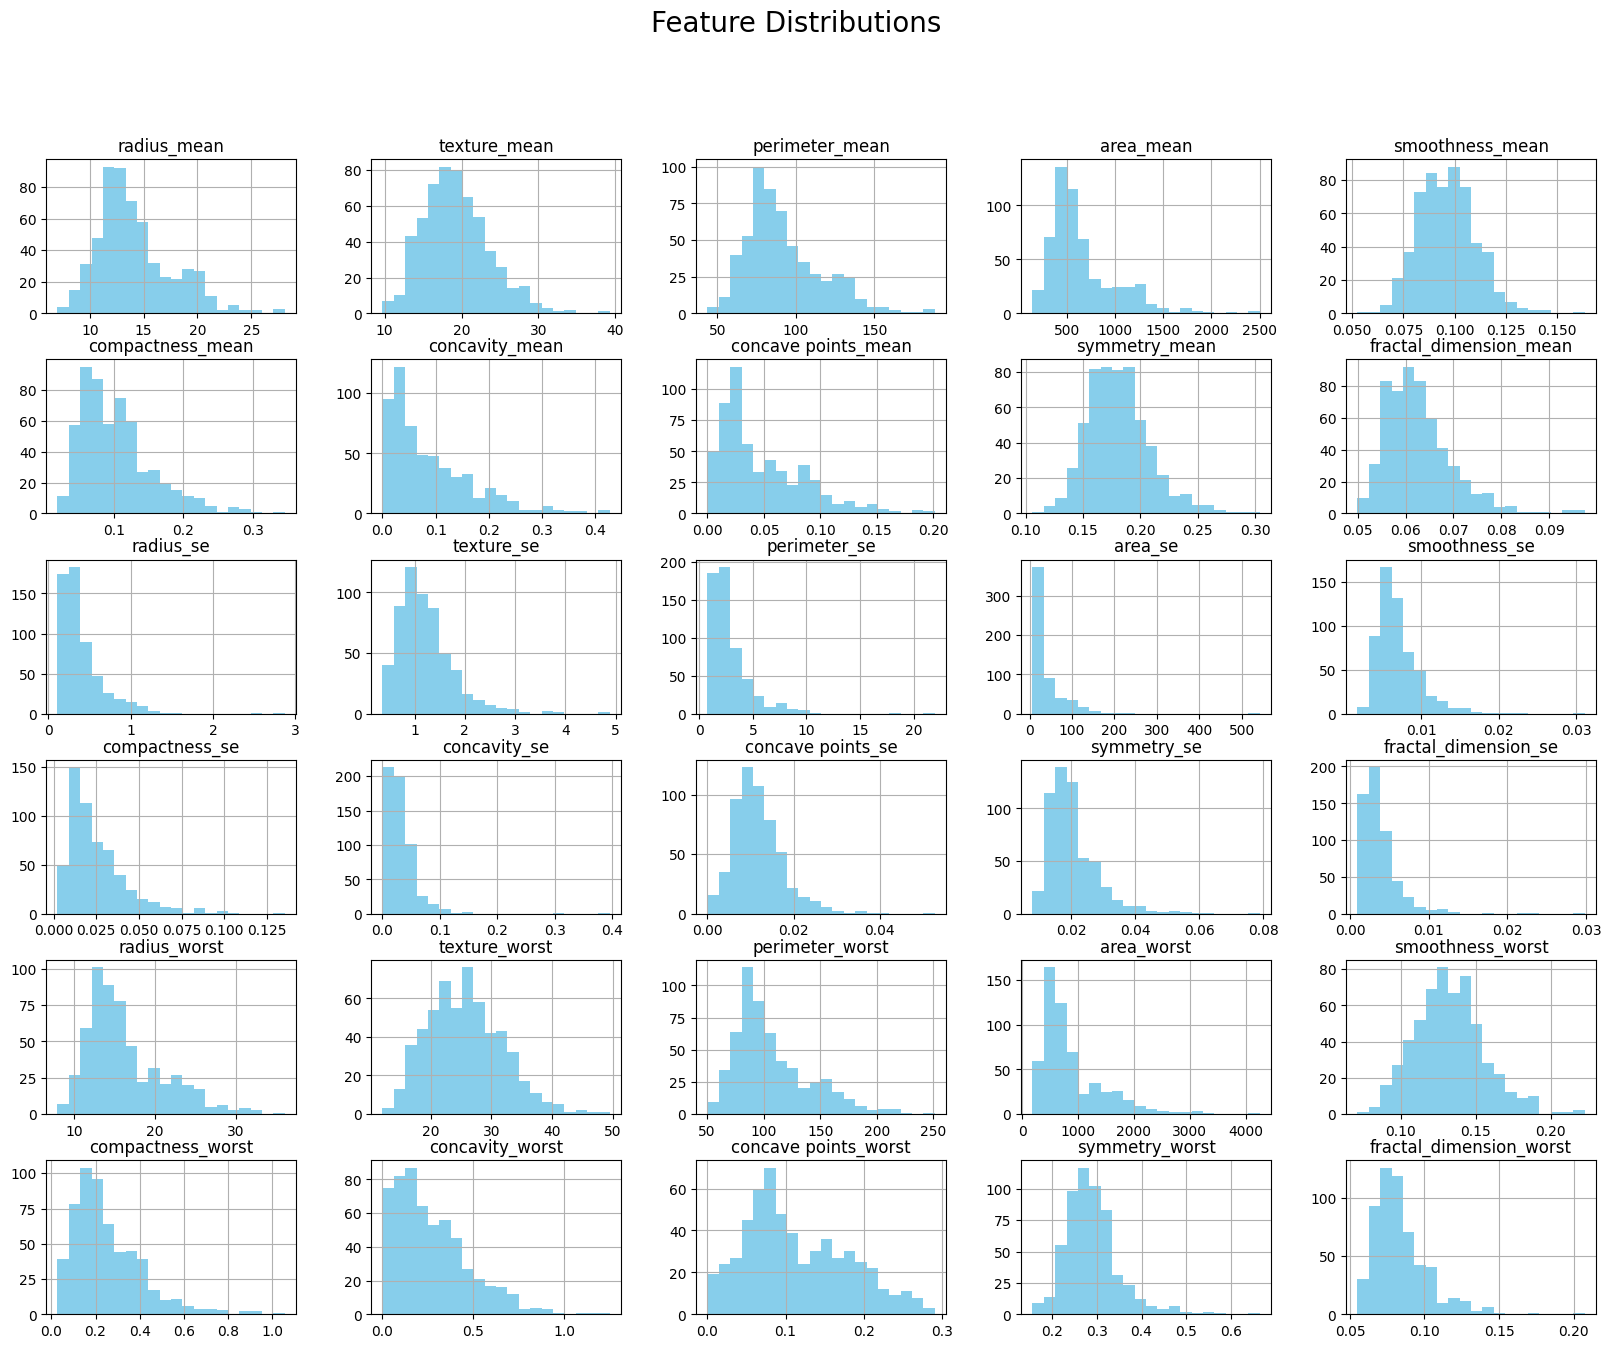

In [ ]:
df_features = df.drop('diagnosis', axis=1)
df_features.hist(bins=20, figsize=(20, 15), color='skyblue')
plt.suptitle('Feature Distributions', fontsize=20)
plt.show()

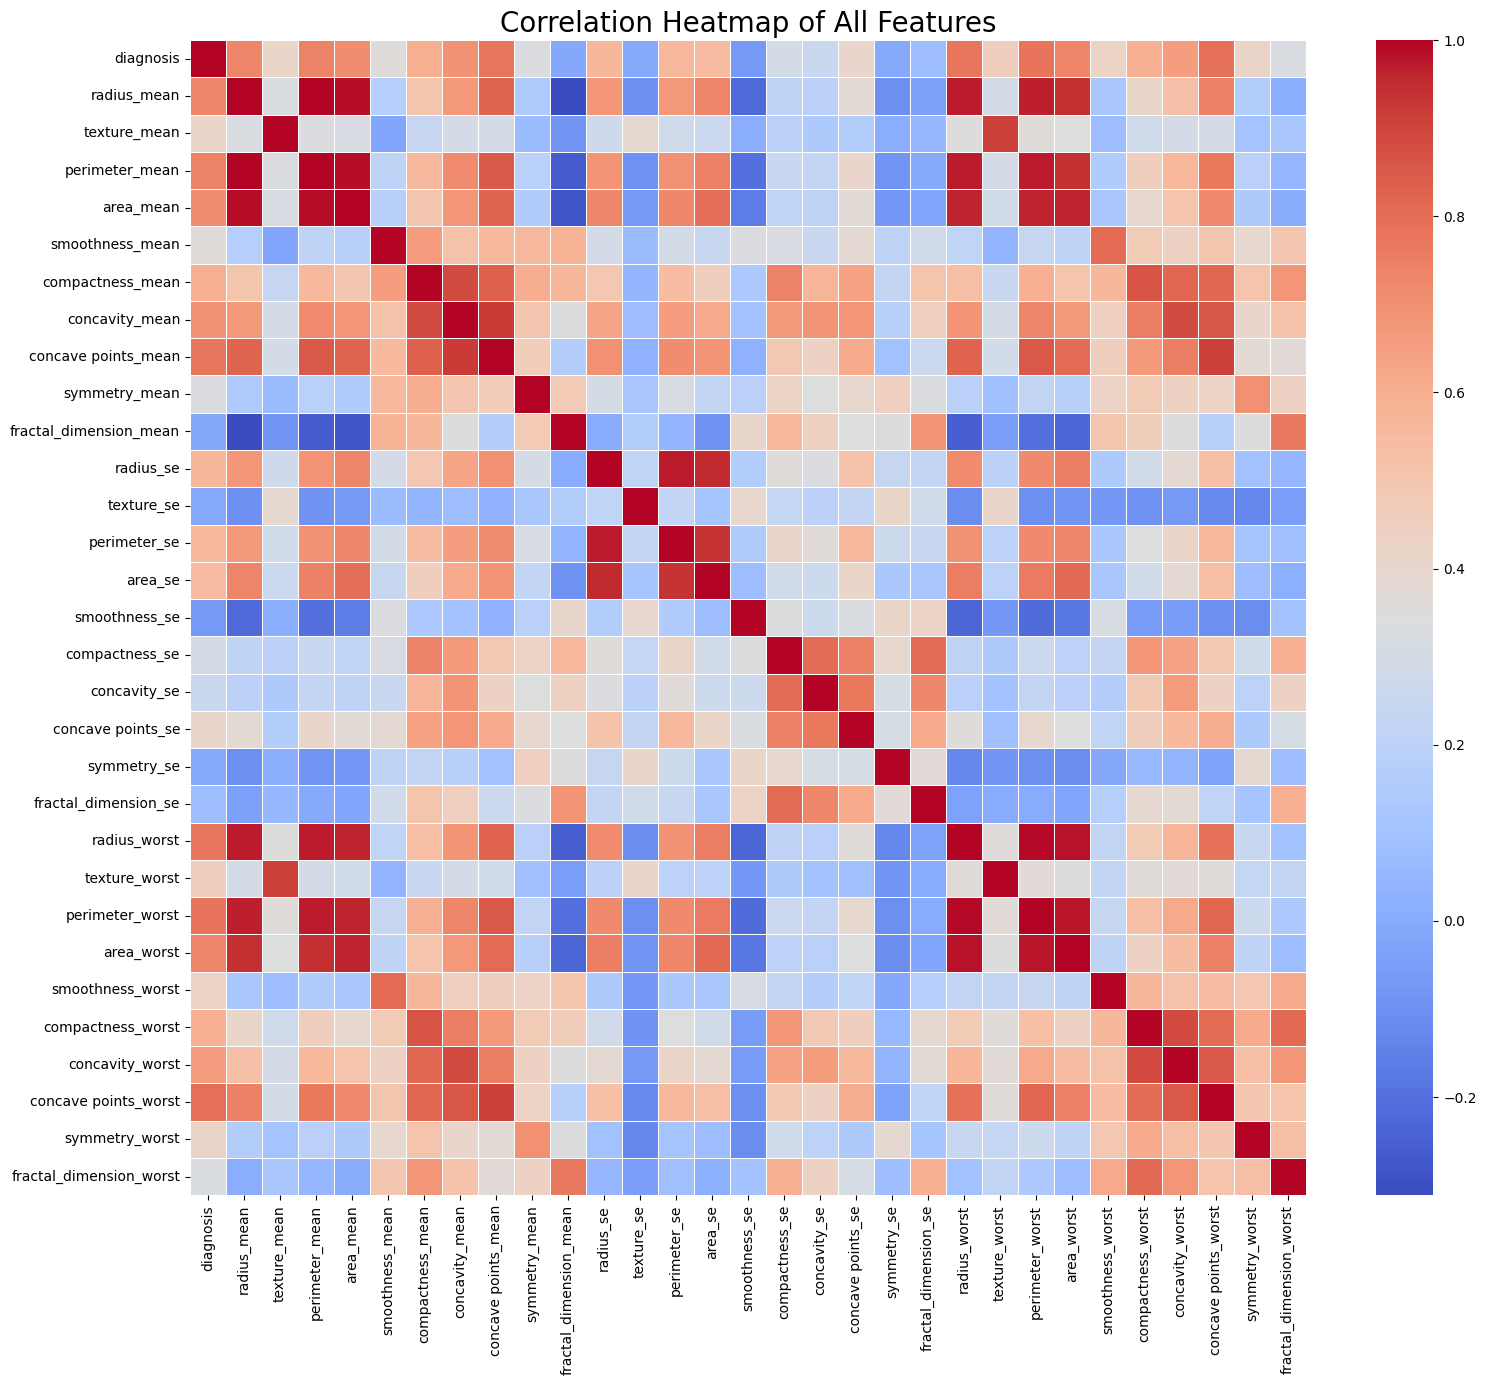

In [ ]:
plt.figure(figsize=(18,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features', fontsize=20)
plt.show()

<Figure size 1500x1000 with 0 Axes>

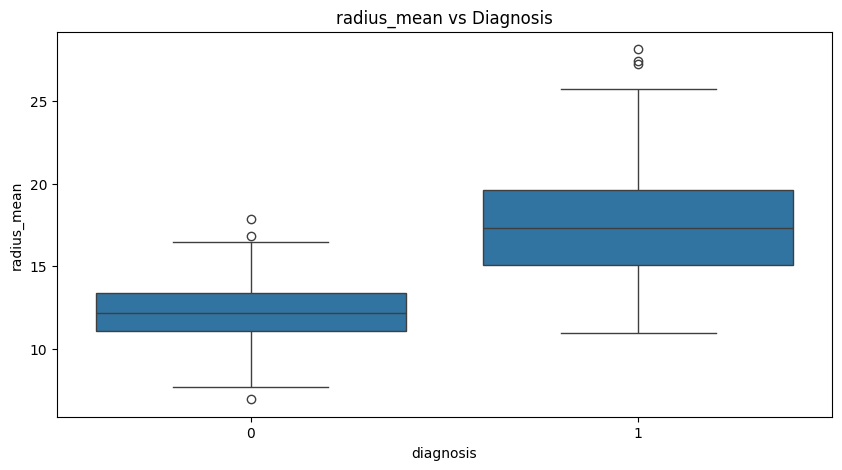

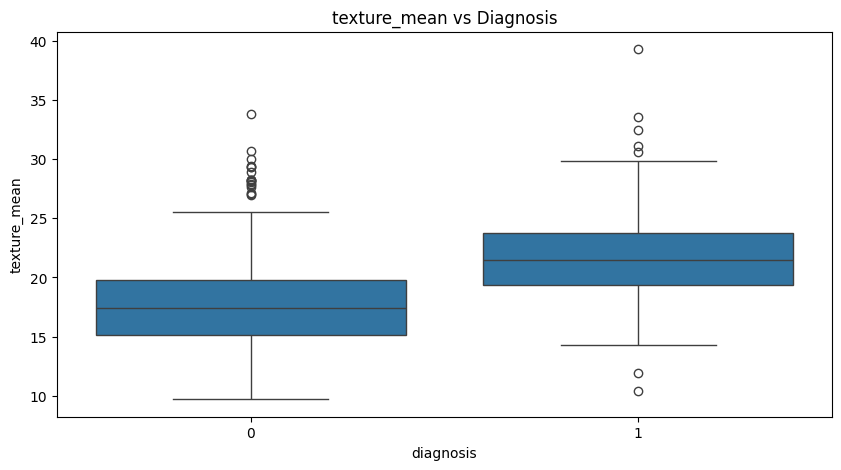

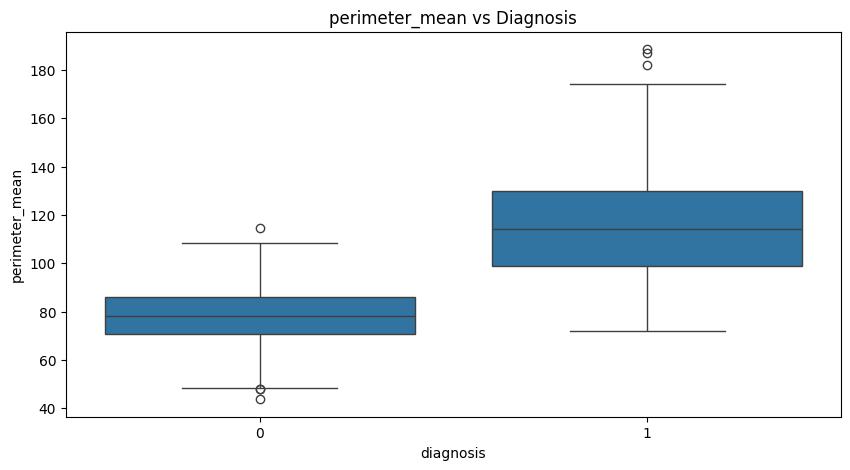

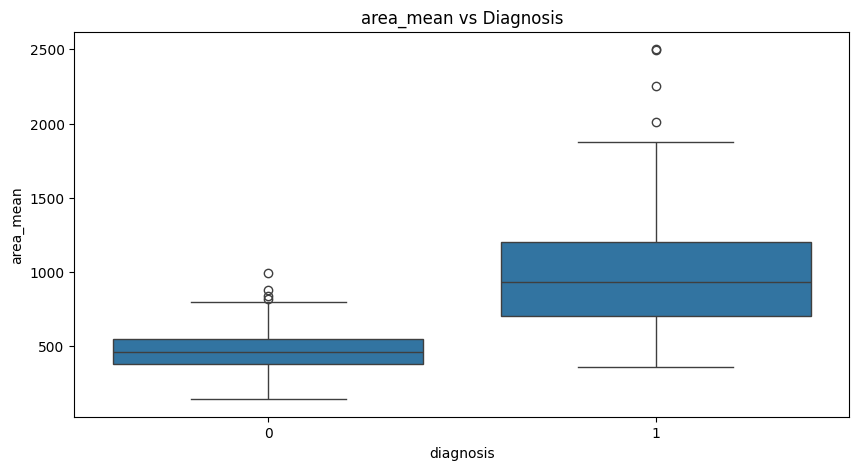

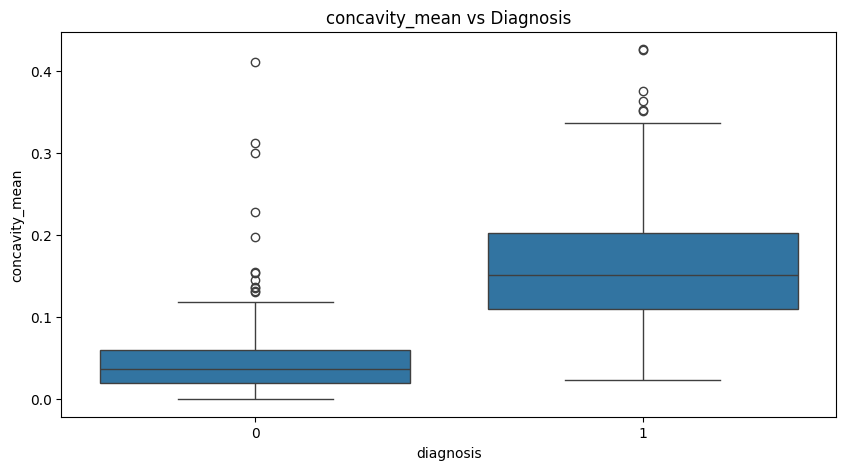

In [ ]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean']

plt.figure(figsize=(15, 10))
for col in selected_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='diagnosis', y=col, data=df)
    plt.title(f'{col} vs Diagnosis')
    plt.show()

Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [ ]:
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 455
Testing samples: 114


In [ ]:
preprocessing_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

In [ ]:
X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

In [ ]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
y_pred = model_pipeline.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f" Accuracy: {accuracy:.4f}")
print(f" Precision: {precision:.4f}")
print(f" Recall: {recall:.4f}")
print(f" F1 Score: {f1:.4f}")

 Accuracy: 0.9737
 Precision: 0.9762
 Recall: 0.9535
 F1 Score: 0.9647


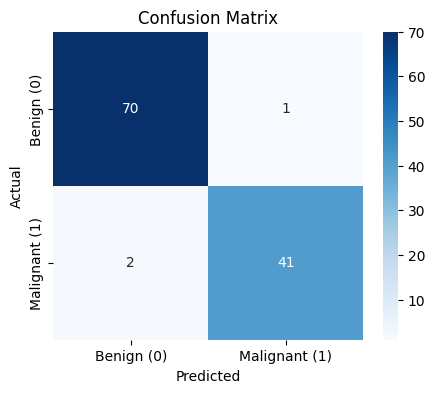

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
import joblib
joblib.dump(model_pipeline, '../models/logreg_model.pkl')

['../models/logreg_model.pkl']

In [ ]:
model = joblib.load('../models/logreg_model.pkl')

In [ ]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
X_train.columns.tolist()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']